# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Seiring berjalannya waktu, banyak karyawan menuntut kenaikan gaji dan menambahnya usia karyawan.
Kebanyakan perusahaan menuntut para karyawannya untuk bekerja secara cepat. Namun, faktor usia
karyawan tidak bisa bekerja secara cepat. HRD perusahaan ingin memprediksi apakah beberapa
karyawan akan meninggalkan perusahaan dalam 2 tahun mendatang atau tidak.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)
bertujuan untuk menganalisis dan memprediksi karyawan apakah akan meninggalkan perusahaan dalam
2 tahun ke depan atau tidak. Diharapkan dengan adanya model ini bisa membantu perusahaan dalam
mengambil keputusan untuk membuka lowongan baru. 

In [ ]:
Data Understanding

Education : pedidikan terakhir dari karyawan
JoiningYear : tahun awal masuknya karyawan
City : kota tempat tinggal karyawan
PaymentTier : tingkatan gaji karyawan
Age : usia karyawan
Gender : jenis kelamin karyawan
EverBenched : apakah karyawan meninggalkan proyek dalam satu bulan atau lebih
ExperienceInCurrentDomain : lama kerja di perusahaan ini
LeaveOrNot : apakah karyawan akan meninggalkan perusahaan dalam 2 tahun ke depan

In [ ]:
Data Preparation

Dalam dataset ini, yang digunakan menjadi fitur yaitu: 

- Education
- JoiningYear
- PaymentTier
- Gender
- EverBenched
- ExperienceInCurrentDomain
- LeaveOrNot    

Sedangkan, kolom yang digunakan sebagai target adalah kolom LeaveOrNot

In [ ]:
Modeling

Model yang digunakan adalah K-NearestNeighbor atau KNN

In [ ]:
Evaluation

Evaluasi merupakan tahap validasi model yang dibentuk berdasarkan parameter-parameter yang relevan.
Parameter tersebut bisa berupa Parameter statistik, Parameter ekonomi dan lain-lain. Pada tahap
evaluasi juga dilakukan pengujian data training dengan data testing.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("Employee.xls")

In [37]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# Visualisasi Data

<Axes: xlabel='JoiningYear', ylabel='count'>

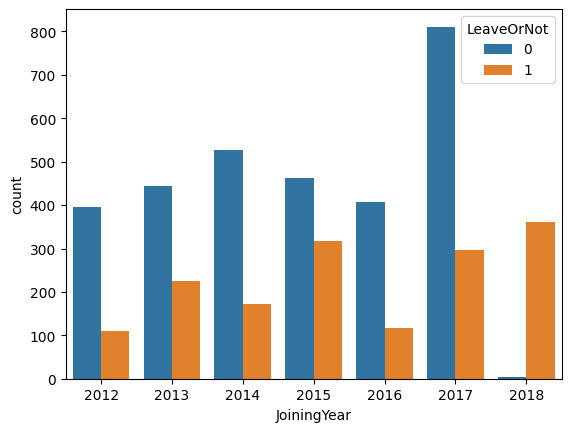

In [71]:
import seaborn as sns

df['JoiningYear'] = df['JoiningYear'].astype('object')
sns.countplot(data = df ,x='JoiningYear',hue='LeaveOrNot')

<Axes: xlabel='Gender', ylabel='count'>

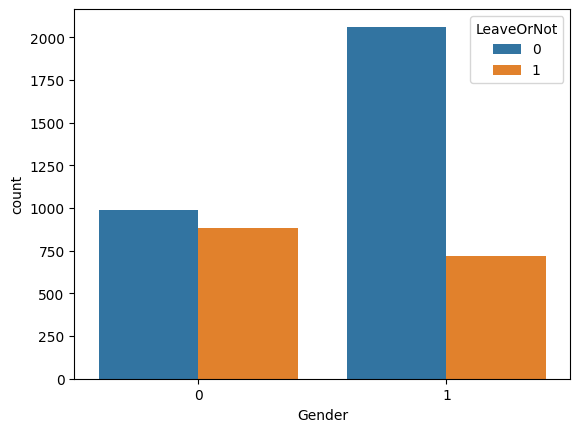

In [72]:
sns.countplot(data = df ,x='Gender',hue='LeaveOrNot')

<Axes: xlabel='Education', ylabel='count'>

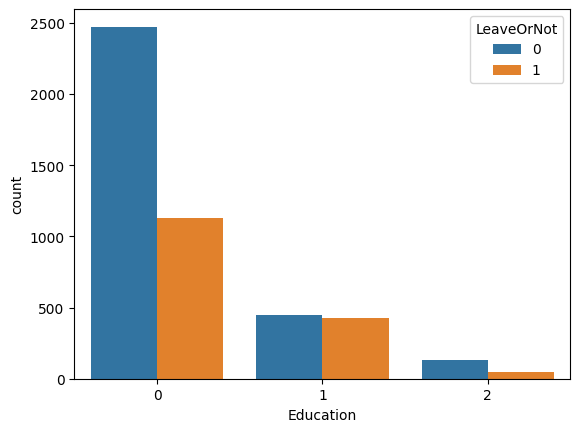

In [73]:
sns.countplot(data = df ,x='Education',hue='LeaveOrNot')

# Transfromasi Data

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])
df['Gender'] = le.fit_transform(df['Gender'])

In [70]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,1,0,0,0
1,0,2013,Pune,1,28,0,0,3,1
2,0,2014,New Delhi,3,38,0,0,2,0
3,1,2016,Bangalore,3,27,1,0,5,1
4,1,2017,Pune,3,24,1,1,2,1


In [56]:
df.to_csv('employee.csv')

# Split data

In [57]:
X = df.drop(columns=['LeaveOrNot', 'City'], axis=1)
Y = df['LeaveOrNot']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [59]:
print(X.shape, x_train.shape, x_test.shape)

(4653, 7) (3722, 7) (931, 7)


# Membuat Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [61]:
model = knn.fit(x_train, y_train)

# Evaluasi model

In [62]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [63]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8296614723267061


In [64]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [65]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.757250268528464


# Model Prediksi

In [69]:
input_data = (0, 2013, 1, 28, 0, 0, 3)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Karyawan Tidak Meninggalkan Perusahaan Dalam 2 Tahun Ke Depan')
else:
    print('Karyawan Akan Meninggalkan Perusahaan Dalam 2 Tahun Ke Depan')

[1]
Karyawan Akan Meninggalkan Perusahaan Dalam 2 Tahun Ke Depan


C:\Users\zaiim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [74]:
import pickle

filename = 'karyawan.sav'
pickle.dump(model, open(filename, 'wb'))